# Assignments for "Visualization with Seaborn"

In this assignment you will continue to make some plots on the [Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data). For plotting you will use Seaborn library. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('owid-covid-data.csv', parse_dates=["date"], low_memory=False)

1. Plot a line plot with seaborn for total deaths four the four countries (Spain, France, Germany, Italy) after April 1, 2020.

In [2]:
df2=df[df["location"].isin(["Germany","France","Italy","Spain"])& (pd.to_datetime("2020-04-01") <= df["date"])]       
df2

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
11866,FRA,Europe,France,2020-04-01,52128.0,7578.0,3523.0,499.0,798.609,116.096,...,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66
11867,FRA,Europe,France,2020-04-02,56989.0,4861.0,4032.0,509.0,873.080,74.471,...,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66
11868,FRA,Europe,France,2020-04-03,59105.0,2116.0,4503.0,471.0,905.497,32.417,...,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66
11869,FRA,Europe,France,2020-04-04,64338.0,5233.0,6507.0,2004.0,985.668,80.170,...,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66
11870,FRA,Europe,France,2020-04-05,68605.0,4267.0,7560.0,1053.0,1051.039,65.371,...,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30885,ESP,Europe,Spain,2020-08-08,314362.0,0.0,28503.0,0.0,6723.633,0.000,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
30886,ESP,Europe,Spain,2020-08-09,314362.0,0.0,28503.0,0.0,6723.633,0.000,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
30887,ESP,Europe,Spain,2020-08-10,322980.0,8618.0,28576.0,73.0,6907.956,184.323,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
30888,ESP,Europe,Spain,2020-08-11,326612.0,3632.0,28581.0,5.0,6985.638,77.682,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56


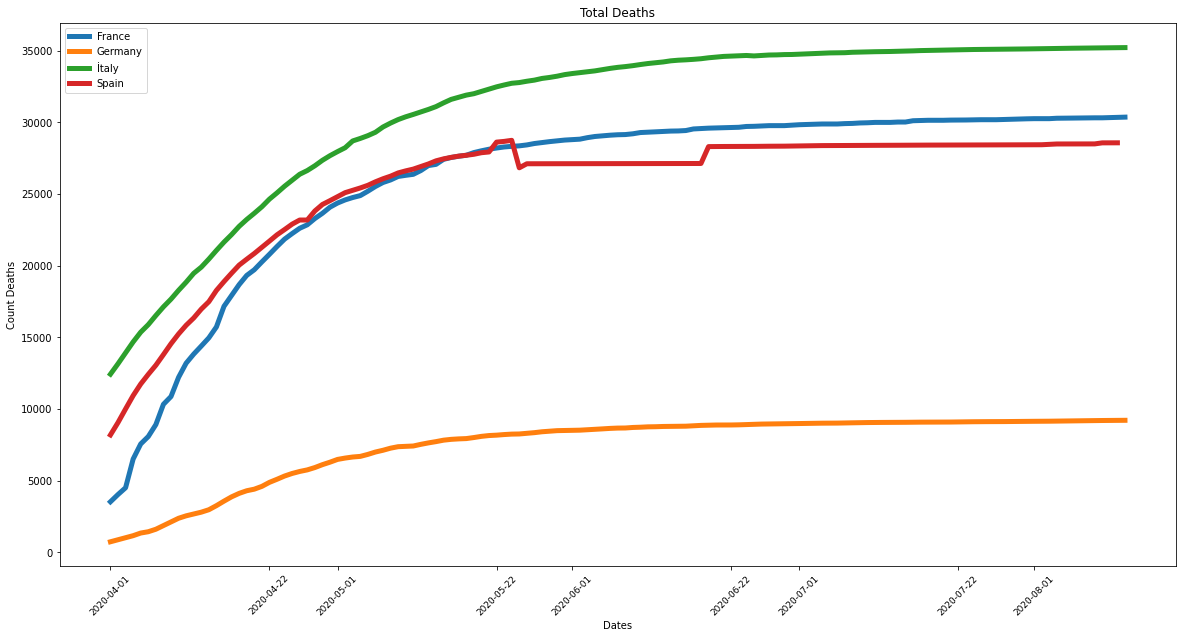

In [3]:
plt.figure(figsize=(20,10))
plt.title("Total Deaths")
sns.lineplot(x = 'date', y = 'total_deaths', data = df2,hue = 'location',lw=5)
plt.xlabel("Dates")
plt.ylabel("Count Deaths")
plt.xticks(rotation = 45, fontsize = 9)
plt.legend(["France","Germany","İtaly","Spain"])
plt.show()

2. Plot a bar plot with seaborn for average death number that compares continents.

In [4]:
df3 =df.groupby("continent")['new_deaths'].mean()
df3

continent
Africa            2.955696
Asia             12.828121
Europe           21.163092
North America    42.704195
Oceania           0.292553
South America    77.638798
Name: new_deaths, dtype: float64

In [5]:
df4=pd.DataFrame(df3).reset_index()
df4

,continent,new_deaths
0,Africa,2.955696
1,Asia,12.828121
2,Europe,21.163092
3,North America,42.704195
4,Oceania,0.292553
5,South America,77.638798


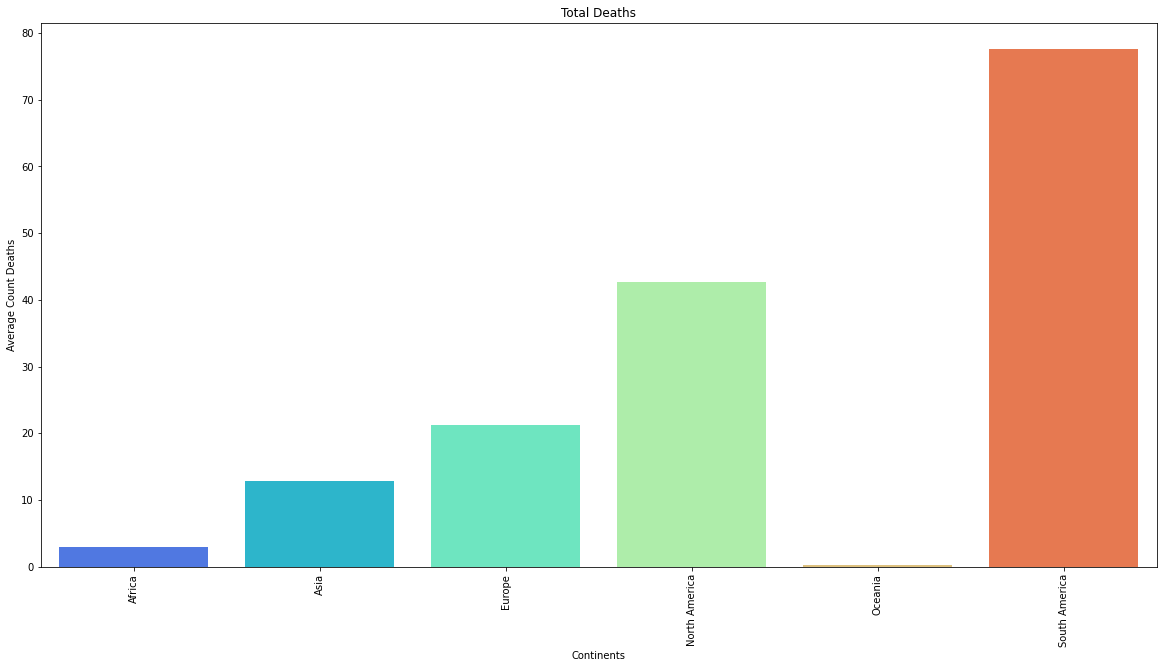

In [6]:
plt.figure(figsize=(20,10))
plt.title("Total Deaths")
sns.barplot(x="continent",y="new_deaths",data=df4,palette='rainbow')
plt.xlabel("Continents")
plt.ylabel("Average Count Deaths")
plt.xticks(rotation = 90)
plt.show()

3. Plot a histogram for daily deaths for any country you choose. Make four subplots for different bin counts and `kde` arguments.

In [7]:
df5=pd.DataFrame(df[df['location']=="United States"])

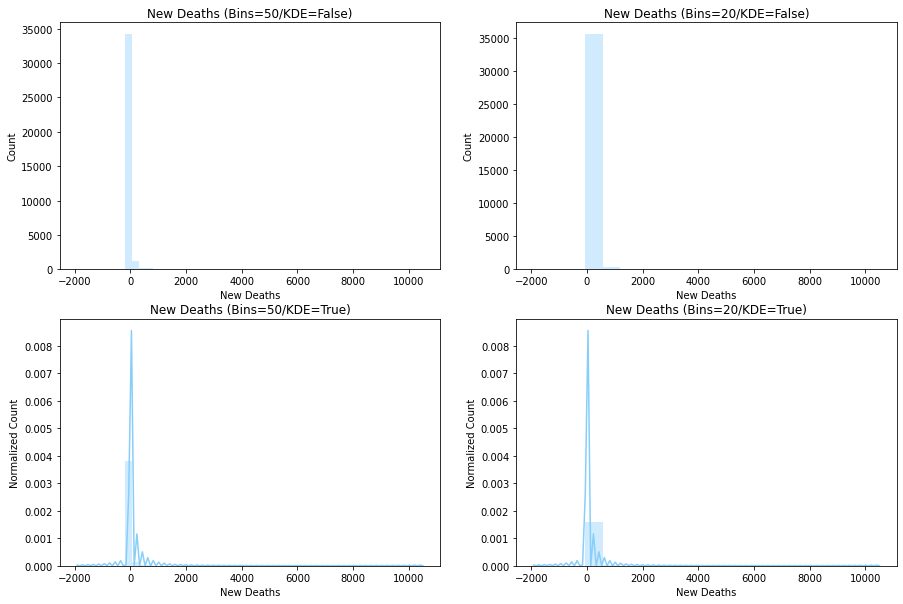

In [8]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("New Deaths (Bins=50/KDE=False)")
sns.distplot(df["new_deaths"].dropna(), bins=50, kde=False,color = 'lightskyblue')
plt.xlabel("New Deaths")
plt.ylabel("Count")


plt.subplot(2,2,2)
plt.title("New Deaths (Bins=20/KDE=False)")
sns.distplot(df["new_deaths"].dropna(), bins=20, kde=False, color = "lightskyblue")
plt.xlabel("New Deaths")
plt.ylabel("Count")


plt.subplot(2,2,3)
plt.title("New Deaths (Bins=50/KDE=True)")
sns.distplot(df["new_deaths"].dropna(), bins=50, kde=True, color = "lightskyblue")
plt.xlabel("New Deaths")
plt.ylabel("Normalized Count")


plt.subplot(2,2,4)
plt.title("New Deaths (Bins=20/KDE=True)")
sns.distplot(df["new_deaths"].dropna(), bins=20, kde=True, color = "lightskyblue")
plt.xlabel("New Deaths")
plt.ylabel("Normalized Count")

plt.show()

4. Create a figure and three subplots containing boxplot, violin plot and swarm plot for daily deaths of two countries you choose.

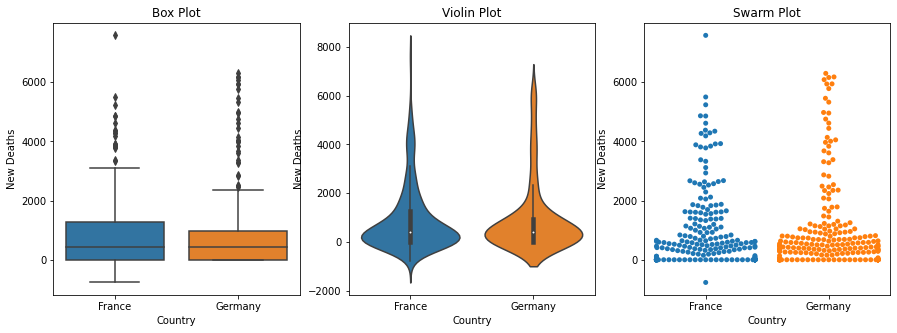

In [9]:
df6=pd.DataFrame(df[df['location'].isin(["France","Germany"])])

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Box Plot")
sns.boxplot(df6["location"],df6["new_cases"])
plt.xlabel("Country")
plt.ylabel("New Deaths")

plt.subplot(1,3,2)
plt.title("Violin Plot")
sns.violinplot(df6["location"],df6["new_cases"])
plt.xlabel("Country")
plt.ylabel("New Deaths")

plt.subplot(1,3,3)
plt.title("Swarm Plot")
sns.swarmplot(df6["location"],df6["new_cases"])
plt.xlabel("Country")
plt.ylabel("New Deaths")

plt.show()